# Notebook for statistical  and time series analysis of the dataset "NYC Yellow Taxi Trip Data" 

### Install the required packages, lunch this cell only once (code 1)


In [1]:
%pip install kagglehub
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install folium
import seaborn as sns
from scipy.stats import norm, alpha
import numpy as np
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, MarkerCluster
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Download the dataset and load the data
##### lunch this cell only once (code 2)

In [2]:
# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
# print("Path to dataset files:", path) use only for debug
file_path1 = os.path.join(path, "yellow_tripdata_2015-01.csv")  # Path to the dataset file
file_path2 = os.path.join(path, "yellow_tripdata_2016-01.csv")  # Path to the dataset file
file_path3 = os.path.join(path, "yellow_tripdata_2016-02.csv")  # Path to the dataset file
file_path4 = os.path.join(path, "yellow_tripdata_2016-03.csv")  # Path to the dataset file

#### there is un error in un colum, so you must run this script for  update and change the column name in first dataset (if you need this column)  (code 3)

In [ ]:
def update_and_change(file_path):
    df = pd.read_csv(file_path)
    # Update the column name
    if 'RateCodeID' in df.columns:
        df.rename(columns={'RateCodeID': 'RatecodeID'}, inplace=True)
    return df

df_2015_01 = update_and_change(file_path1)

#####  Check if database was imported correctly, this script is optional will be used only for debug (code 4)

In [ ]:
# Check if the file exists
if os.path.exists(file_path1):
    # upload the file to the notebook
    df = pd.read_csv(file_path1)

    # Print the colum names
    print("Nomi delle colonne nel dataset:", df.columns.tolist())
else:
    print(f"Il file non esiste. Controlla il percorso: {file_path1}")


### Statistical analysis in colum VendorID for the dataset

##### Union of the dataset and creation of the bar plot for the frequency of the VendorID (code 5)

In [3]:
#! before run this you must run the code 1 and 2
vendor_colum = ['VendorID']
df_2015_01 = pd.read_csv(file_path1, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=vendor_colum)    # Load the dataset  in a DataFrame
print("Number of rows in the dataset 2015-01:", len(df_2015_01))
print("Number of rows in the dataset 2016-01:", len(df_2016_01))
print("Number of rows in the dataset 2016-02:", len(df_2016_02))
print("Number of rows in the dataset 2016-03:", len(df_2016_03))

# Concatenate the dataframes
df = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

Number of rows in the dataset 2015-01: 12748986
Number of rows in the dataset 2016-01: 10906858
Number of rows in the dataset 2016-02: 11382049
Number of rows in the dataset 2016-03: 12210952


#### Creation of the bar plot for the frequency of the VendorID (code 6)

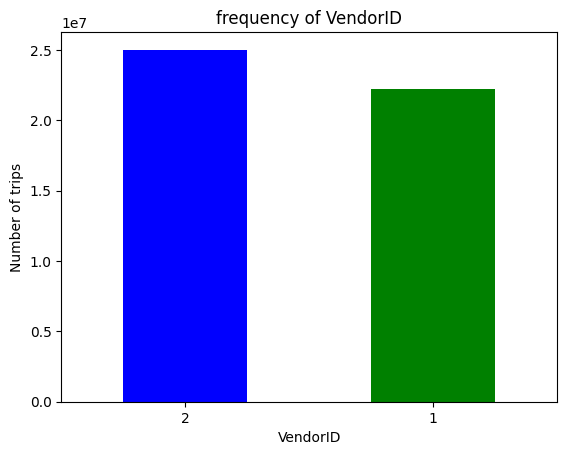

In [5]:
#! before run this you must run the code 1 and 2 and 5
fr_vendor = df['VendorID'].value_counts()

# creation of the bar plot
fr_vendor.plot(kind='bar', color=['blue', 'green'])

# add title and labels
plt.title("frequency of VendorID")
plt.xlabel("VendorID")
plt.ylabel("Number of trips")
plt.xticks(rotation=0)

# show the plot
plt.show()

### Analysis of the distribution of the trips by hour (code 7)

In [10]:
#! before run this you must run the code 1 and 2
# union in a single csv only with the column RateCodeID
colum_rate = ['RatecodeID'] 
df_2015_01_filtered = df_2015_01[['RatecodeID']]    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=colum_rate)    # Load the dataset  in a DataFrame
df=pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)



Creation of the bar plot for the frequency of the RateCodeID (code 8)

In [4]:
#! before run this you must run the code 1 and 2 and 7
# Count the frequency of each RateCodeID
frequent_rate_id = df['RatecodeID'].value_counts()

# create the bar plot
plt.figure(figsize=(10, 6))
frequent_rate_id.plot(kind='bar', color='skyblue')

# add title and labels
plt.title("Frequenza dei Codici Tariffari (RateCodeID)")
plt.xlabel("RatecodeID")
plt.ylabel("Numero di corse")
plt.xticks(rotation=0)
#show the plot
plt.show()
print(frequent_rate_id)

NameError: name 'df' is not defined

In [ ]:
import seaborn as sns
from scipy.stats import norm, alpha
import matplotlib.pyplot as plt
import numpy as np
colum = ['tpep_pickup_datetime'] # scelgo la colonna tpep_pickup_datetime
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum)     
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

# convert the column to datetime
df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

# extract the hour from the datetime
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour

# create the gaussian distribution
# plt.figure(figsize=(10, 6))
# df_total['hour'].hist(bins=24, color='skyblue', edgecolor='black')

#couht the frequency of each hour
hour_freq = df_total['hour'].value_counts().sort_index()

# create array with the hours
hours=hour_freq.index
counts=hour_freq.values

#plot for hour distribution of trips
plt.figure(figsize=(10, 6))
sns.barplot(x=hours, y=counts, color='skyblue')
plt.title("Distriubution of trips by hour")
plt.xlabel("hour")
plt.ylabel("Number of trips")
plt.xticks(np.arange(0, 24, 1))
plt.show()

#### Calculate the mean and the standard deviation of the distribution of the trips by hour (code 9)

In [ ]:
mu, std = norm.fit(df_total['hour'])

# create the gaussian distribution
xmin,xmax=0,23
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# plot the histogram 
# plt.figure(figsize=(10, 6))
# plt.plot(x,p,'r-', lw=2 ,label='Gaussian fit' ) # Gaussian fit
# sns.histplot(df_total['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False,alpha=0.6)
# plt.title("Distribuzione oraria delle corse")
# plt.xlabel("Ora")
# plt.ylabel("Densità")
# plt.xticks(np.arange(0, 24, 1))
# plt.show()
# plt.legend()
#center the plot in the middle
# plt.xlim(xmin,xmax)
# plt.show()
#plot the instogram and the gaussian distribution centered in the middle
plt.figure(figsize=(10, 6))
plt.plot(x,p,'r-', lw=2 ,label='Gaussian fit' ) # Gaussian fit
sns.histplot(df_total['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False,alpha=0.6)
#order the x axis and put the center of gayssian distribution in the middle
plt.xlim(xmin,xmax)
plt.title("Distribution of trips by hour")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.xticks(np.arange(0, 24, 1))
plt.show()
plt.legend()

# ha un errore sto codice poi lo vedo

#### barplot follow median and standard deviation (code 10)

In [ ]:
#! before run this you must run the code 1 and 2

#order values from media, so they can follow the gaussian distribution
df_total['distance_from_mean']=np.abs(df_total['hour']-mu)
df_sorted=df_total.sort_values('distance_from_mean')

#plot the barplot
xmin,xmax=0,23
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x,mu,std)

plt.figure(figsize=(10,6))
plt.plot(x, p, 'r-', lw=2, label='Gaussian fit')  # Gaussian fit
sns.histplot(df_sorted['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)
plt.title("Distribution of trips by hour")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.show()

### anlaisys on  drip distance (code 11)

In [ ]:
#! before run this you must run the code 1 and 2

plt.style.use('default')  
sns.set_theme(style="white")  # Set the style of the plots

# Load the dataset in a DataFrame
columns=['trip_distance']
df_2015_01 = pd.read_csv(file_path1, usecols=columns)   # Load the dataset  in a DataFrame  
df_2016_01 = pd.read_csv(file_path2, usecols=columns)
df_2016_02 = pd.read_csv(file_path3, usecols=columns)
df_2016_03 = pd.read_csv(file_path4, usecols=columns)

# Filter date with trip distance between 0 and 100 miles
df_total = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)
df_total_filtered = df_total[(df_total['trip_distance'] > 0) & (df_total['trip_distance'] <= 40)]

# Calculate the mean and standard deviation of the distribution
mu, std = norm.fit(df_total_filtered['trip_distance'])

# Create the Gaussian distribution
x = np.linspace(0, 40, 80)
p = norm.pdf(x, mu, std)        # Gaussian distribution

# Plot the histogram and the Gaussian distribution
plt.figure(figsize=(14, 8))
sns.histplot(df_total_filtered['trip_distance'], bins=40, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)
plt.plot(x, p, 'r-', lw=2, label=f'Gaussian fit (μ={mu:.2f}, σ={std:.2f})')  # Curve of the Gaussian distribution
plt.title("Distribuzione delle distanze dei viaggi (fino a 20 miglia)")
plt.xlabel("Distanza del viaggio (miglia)")
plt.ylabel("Densità")
plt.legend()
plt.show()

### Analysis of the distribution of the trip duration by the hours (code 12)

In [ ]:
#! before run this you must run the code 1, 2  and 3
# #unite all dataset in a single csv
file_paths=[file_path2, file_path3, file_path4]
def load_columns(file_paths, columns_envolved):
    df_list = []
    for file_path in file_paths:
        # load only the columns of interest
        df = pd.read_csv(file_path, usecols=columns_envolved)
        # correct the name of the column RateCodeID
        # df = df[df['RatecodeID'].isin([1, 6])]
        if 'RateCodeID' in df.columns:
            df.rename(columns={'RateCodeID': 'RatecodeID'}, inplace=True)
        df_list.append(df)
    # unite all the dataframes
    return pd.concat(df_list, ignore_index=True)
df_distance = load_columns(file_paths, columns_envolved=['trip_distance'])
df_time_fase = load_columns(file_paths, columns_envolved=['trip_distance', 'tpep_pickup_datetime'])

In [ ]:
# 3. Cluster the data by the hour
#df_ratecode_parzial = load_colums(file_paths, colums_envolved=['trip_distance', 'RatecodeID'])
#filter ratecodeID between 0 and 6

df_ratecode_parzial = load_columns(file_paths, columns_envolved=['trip_distance', 'RatecodeID', 'tpep_pickup_datetime'])
df_2015_01_filtered = df_2015_01[['trip_distance', 'RatecodeID', 'tpep_pickup_datetime']]    # Load the dataset  in a DataFrame
df_ratecode=pd.concat([df_2015_01_filtered, df_ratecode_parzial], ignore_index=True)
# convert the column to datetime
df_ratecode['tpep_pickup_datetime'] = pd.to_datetime(df_ratecode_parzial['tpep_pickup_datetime'])
df_ratecode['pickup_hour'] = df_ratecode['tpep_pickup_datetime'].dt.hour

# Calculate the number of trips for each hour
trip_for_hour = df_ratecode.groupby('pickup_hour').size()

### code 13

In [ ]:
#! before run this you must run the code 1, 2 ,3 and 12

distance_media_for_hour = df_ratecode.groupby('pickup_hour')['trip_distance'].mean()

# Plot the number of trips and the average distance for each hour
plt.figure(figsize=(12, 6))

# Number of trips for each hour
plt.subplot(2, 1, 1)
trip_for_hour.plot(kind='bar', color='skyblue')
plt.title('Numero di Viaggi per Ora')
plt.xlabel('Ora del Giorno')
plt.ylabel('Numero di Viaggi')
plt.xticks(rotation=0)

# Distance for each hour
plt.subplot(2, 1, 2)
distance_media_for_hour.plot(kind='line', marker='o', color='orange')
plt.title('Distanza Media per Ora')
plt.xlabel('Ora del Giorno')
plt.ylabel('Distanza Media del Viaggio')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Crete realtions with ratecode and trip distance (code 14)

### map of the trips (code 15)
# exercise with folium

In [ ]:
columns_needed = [
    'tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude'
]

df_2015_01 = pd.read_csv(file_path1, usecols=columns_needed)   # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=columns_needed)
df_2016_02 = pd.read_csv(file_path3, usecols=columns_needed)
df_2016_03 = pd.read_csv(file_path4, usecols=columns_needed)
#concate all the dataframes
df= pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

#convert the column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# define the period of the day
def get_hour_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# create a column for the pickup period
df['pickup_period'] = df['tpep_pickup_datetime'].dt.hour.apply(get_hour_period)

# Filter the data only for the morning period
df = df[(df['pickup_latitude'] != 0) & (df['pickup_longitude'] != 0) &
        (df['dropoff_latitude'] != 0) & (df['dropoff_longitude'] != 0)]


In [ ]:
# Create the map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add a cluster to group the points
marker_cluster = MarkerCluster().add_to(nyc_map)

# Group the most frequent routes
for period in df['pickup_period'].unique():
    period_data = df[df['pickup_period'] == period]
    #   Group the most frequent routes
    frequent_routes = period_data.groupby(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='counts')
    top_routes = frequent_routes.nlargest(40, 'counts') 
    
    # Add the routes, the start and end markers on the map
    for _, row in top_routes.iterrows():
        folium.PolyLine(
            locations=[(row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])],
            color='blue' if period == 'morning' else 'green' if period == 'afternoon' else 'orange' if period == 'evening' else 'purple',
            weight=20,
            opacity=1  
        ).add_to(marker_cluster)


# Show the map
nyc_map

### Antoher tipe of maps (code 16) Clusterizzazione per Tratte

In [ ]:
# Filter only the data for the morning
morning_data = df[df['pickup_period'] == 'morning']

# create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# add a cluster to group the points
marker_cluster = MarkerCluster().add_to(nyc_map)

# gruop the most frequent routes
frequent_routes = morning_data.groupby(
    ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
).size().reset_index(name='counts')
top_routes = frequent_routes.nlargest(40, 'counts')  # Prendiamo le 40 tratte più comuni

# add the routes, the start and end markers on the map
for _, row in top_routes.iterrows():
    # trip
    folium.PolyLine(
        locations=[
            (row['pickup_latitude'], row['pickup_longitude']),
            (row['dropoff_latitude'], row['dropoff_longitude'])
        ],
        color='blue',  # Colore per il tragitto
        weight=5,      # Spessore della linea
        opacity=0.7    # Opacità per il tragitto
    ).add_to(marker_cluster)

    # Marker pickup
    folium.Marker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        icon=folium.Icon(color='blue', icon='play', prefix='fa'),  # Icona per identificare il punto di partenza
        popup='Partenza'
    ).add_to(marker_cluster)

    # Marker dropoff
    folium.Marker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        icon=folium.Icon(color='red', icon='flag', prefix='fa'),  # Icona per identificare il punto di arrivo
        popup='Arrivo'
    ).add_to(marker_cluster)

# Visualizza la mappa
nyc_map
# todo: problem whit association of the points

### Data visualizazion ten most pick up e drop off points (code 17)

In [30]:
# Filter only the data for the morning
morning_data = df[df['pickup_period'] == 'morning']

# Find the 10 most frequent pickup points
top_pickups = morning_data.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='counts')
top_pickups = top_pickups.nlargest(10, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Find the 10 most frequent dropoff points
top_dropoffs = morning_data.groupby(['dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='counts')
top_dropoffs = top_dropoffs.nlargest(10, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Create the map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Cluster for pickup and dropoff points (is not important in ten most pick up and drop off points)
pickup_cluster = MarkerCluster(name='Top 10 Pickup Points - Morning').add_to(nyc_map)
dropoff_cluster = MarkerCluster(name='Top 10 Dropoff Points - Morning').add_to(nyc_map)

# Add the pickup points with explicit index
f=0
for index, row in top_pickups.iterrows():
    f += 1  # Incrementa f
    folium.Marker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        icon=folium.Icon(color='blue', icon='play', prefix='fa'),
        popup=f'Questo è il numero {f} di punti di partenza (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(pickup_cluster)

# Add the dropoff points with explicit index
k = 0  
for index, row in top_dropoffs.iterrows():
    k += 1  # increments k
    folium.Marker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        icon=folium.Icon(color='red', icon='flag', prefix='fa'),
        popup=f'Questo è il numero {k} di punti di arrivo (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(dropoff_cluster)

# add a layer control
folium.LayerControl().add_to(nyc_map)

# show the map
nyc_map
#!!!!!! todo:  problem with the zoom of map

### Clusterinf big data visualization (code 17)

In [ ]:
# Filter only the data for the morning
morning_data = df[df['pickup_period'] == 'morning']

# Find the 100 most frequent pickup points
top_pickups = morning_data.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='counts')
top_pickups = top_pickups.nlargest(100, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Find the 100 most frequent dropoff points
top_dropoffs = morning_data.groupby(['dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='counts')
top_dropoffs = top_dropoffs.nlargest(100, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Create the map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Cluster for pickup and dropoff points
pickup_cluster = MarkerCluster(name='Top 10 Pickup Points - Morning').add_to(nyc_map)
dropoff_cluster = MarkerCluster(name='Top 10 Dropoff Points - Morning').add_to(nyc_map)

# Add the pickup points with explicit index
for index, row in top_pickups.iterrows():
    folium.Marker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        icon=folium.Icon(color='blue', icon='play', prefix='fa'),
        popup=f'Punto di partenza #{index + 1} (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(pickup_cluster)

# Add the dropoff points with explicit index
k = 0 
for index, row in top_dropoffs.iterrows():
    k += 1  
    folium.Marker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        icon=folium.Icon(color='red', icon='flag', prefix='fa'),
        popup=f'Punto di arrivo #{k} (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(dropoff_cluster)

# 
for _, pickup in top_pickups.iterrows():
    for _, dropoff in top_dropoffs.iterrows():
        # Check if the route is in the morning data
        route_data = morning_data[
            (morning_data['pickup_latitude'] == pickup['pickup_latitude']) &
            (morning_data['pickup_longitude'] == pickup['pickup_longitude']) &
            (morning_data['dropoff_latitude'] == dropoff['dropoff_latitude']) &
            (morning_data['dropoff_longitude'] == dropoff['dropoff_longitude'])
        ]
        
        if not route_data.empty:
            folium.PolyLine(
                locations=[(pickup['pickup_latitude'], pickup['pickup_longitude']),
                           (dropoff['dropoff_latitude'], dropoff['dropoff_longitude'])],
                color='green',
                weight=2,
                opacity=0.5
            ).add_to(nyc_map)

# Add a layer control
folium.LayerControl().add_to(nyc_map)

# Show the map
nyc_map
